In [5]:
#Importing the required libraries

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
import os
path="C:/"
d=os.path.join(path,"Users/","rakti/","Downloads/","bank-data/","bank-data/","bank-additional-full.csv")
data_df = pd.read_csv(d, sep=';')  #loading the csv file
data_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [26]:
data_df.describe(include='object')


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


# Data Visualisation

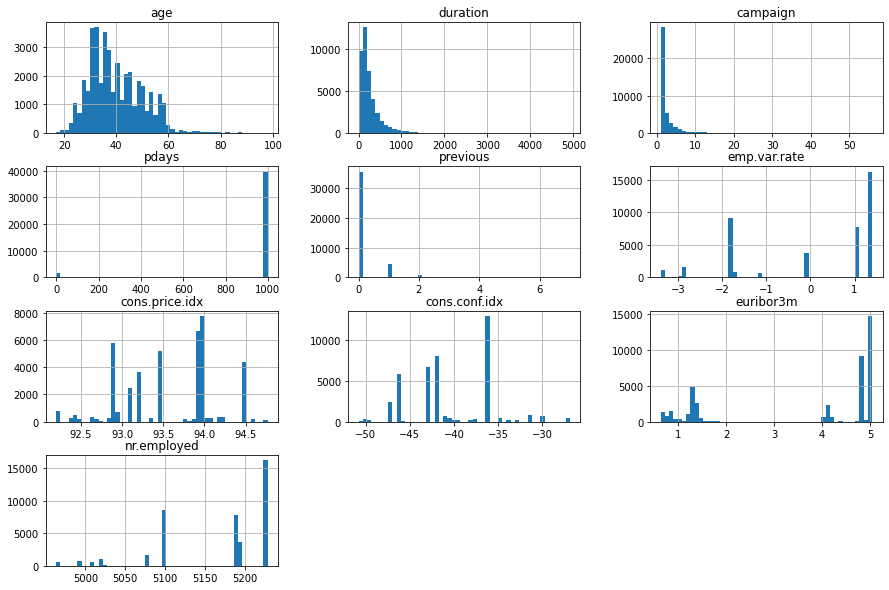

In [27]:
data_df.hist(bins=50,figsize=(15,10))
plt.show()

<AxesSubplot:xlabel='poutcome', ylabel='count'>

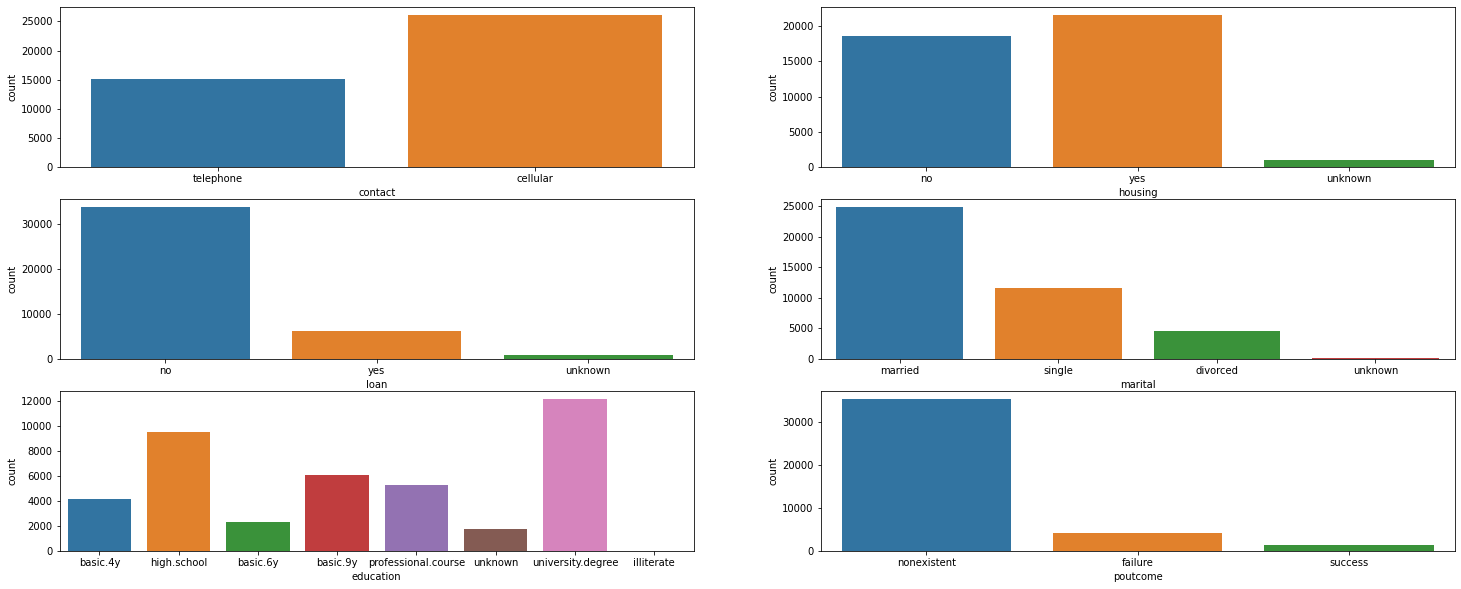

In [28]:
fig, ax = plt.subplots(3,2,figsize=(25,10))
sns.countplot(x="contact",data=data_df,ax=ax[0][0])
sns.countplot(x="housing",data=data_df,ax=ax[0][1])
sns.countplot(x="loan",data=data_df,ax=ax[1][0])
sns.countplot(x="marital",data=data_df,ax=ax[1][1])
sns.countplot(x="education",data=data_df,ax=ax[2][0])
sns.countplot(x="poutcome",data=data_df,ax=ax[2][1])

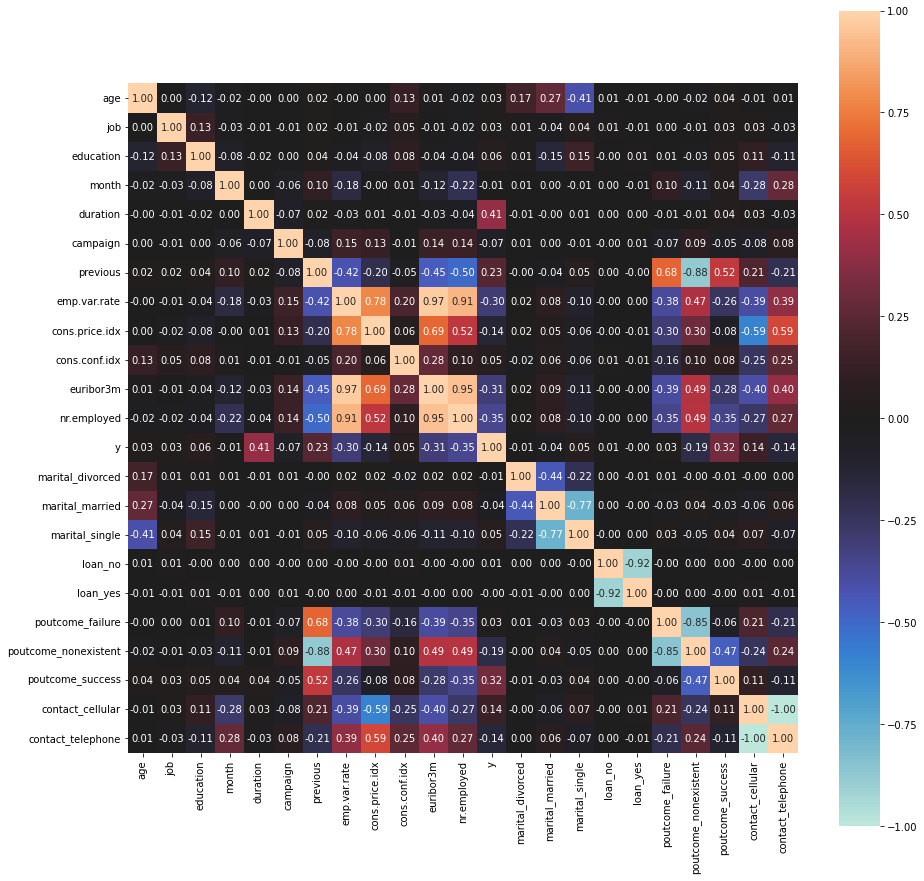

In [72]:
correlations = data_df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, annot=True)
plt.show()

# Data Cleaning

In [30]:
data_df = data_df.drop(["day_of_week",'pdays','default','housing'],axis=1)
data_df = pd.get_dummies(data_df,columns=['marital','loan','poutcome','contact'])
data_df = data_df.drop(['loan_unknown','marital_unknown'],axis=1)
data_df.head()

,age,job,education,month,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,marital_divorced,marital_married,marital_single,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone
0,56,housemaid,basic.4y,may,261,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,0,1
1,57,services,high.school,may,149,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,0,1
2,37,services,high.school,may,226,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,0,1
3,40,admin.,basic.6y,may,151,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,0,1
4,56,services,high.school,may,307,1,0,1.1,93.994,-36.4,...,0,1,0,0,1,0,1,0,0,1


In [31]:
data_df["y"]=data_df["y"].replace("no",0)
data_df["y"]=data_df["y"].replace("yes",1)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_df['job'] = le.fit_transform(data_df['job'])
data_df['education'] = le.fit_transform(data_df['education'])
data_df['month'] = le.fit_transform(data_df['month'])
data_df.head()

,age,job,education,month,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,marital_divorced,marital_married,marital_single,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone
0,56,3,0,6,261,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,0,1
1,57,7,3,6,149,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,0,1
2,37,7,3,6,226,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,0,1
3,40,0,1,6,151,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,0,1
4,56,7,3,6,307,1,0,1.1,93.994,-36.4,...,0,1,0,0,1,0,1,0,0,1


In [69]:
Y=data_df['y']
data_X=data_df.drop(['y'],axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(data_X,Y, test_size=0.3,random_state=51)

# Decision Tree Classifier

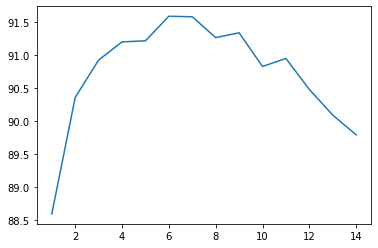

In [70]:
#best depth
dt_dep=[]
for i in range(1,15):
  clf=DecisionTreeClassifier(max_depth=i,random_state=51)
  clf.fit(X_train, Y_train)
  Y_pred=clf.predict(X_test)
  dt_dep.append(metrics.accuracy_score(Y_test,Y_pred)*100)

k=dt_dep.index(max(dt_dep))+1
plt.plot(range(1,15),dt_dep)
plt.show()

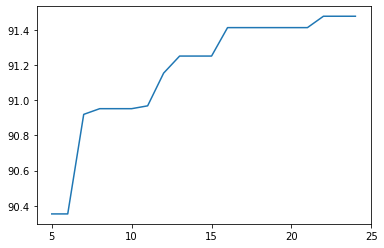

In [40]:
#best leaves
dt_leaf=[]
for i in range(5,25):
  clf=DecisionTreeClassifier(max_depth=k,max_leaf_nodes=i,random_state=51)
  clf.fit(X_train,Y_train)
  Y1_pred=clf.predict(X_test)
  dt_leaf.append(metrics.accuracy_score(Y_test,Y1_pred)*100)   #use recall_score

l=dt_leaf.index(max(dt_leaf))+5
plt.plot(range(5,25),dt_leaf)
plt.xticks([5,10,15,20,25])
plt.show()

In [41]:
clf_best=DecisionTreeClassifier(max_depth=k,max_leaf_nodes=i,random_state=51)
clf_best.fit(X_train,Y_train)
Y1_pred=clf_best.predict(X_test)


              precision    recall  f1-score   support

           0       0.94      0.95      0.94     10947
           1       0.56      0.51      0.53      1410

    accuracy                           0.90     12357
   macro avg       0.75      0.73      0.74     12357
weighted avg       0.89      0.90      0.90     12357



c:\users\rakti\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


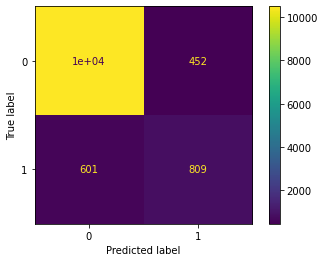

In [49]:
from sklearn.metrics import plot_confusion_matrix
confusion_matrix = plot_confusion_matrix(clf_best, X_test, Y_test)
print(classification_report(Y_test, Y_pred))

# Plotting a Decision Tree

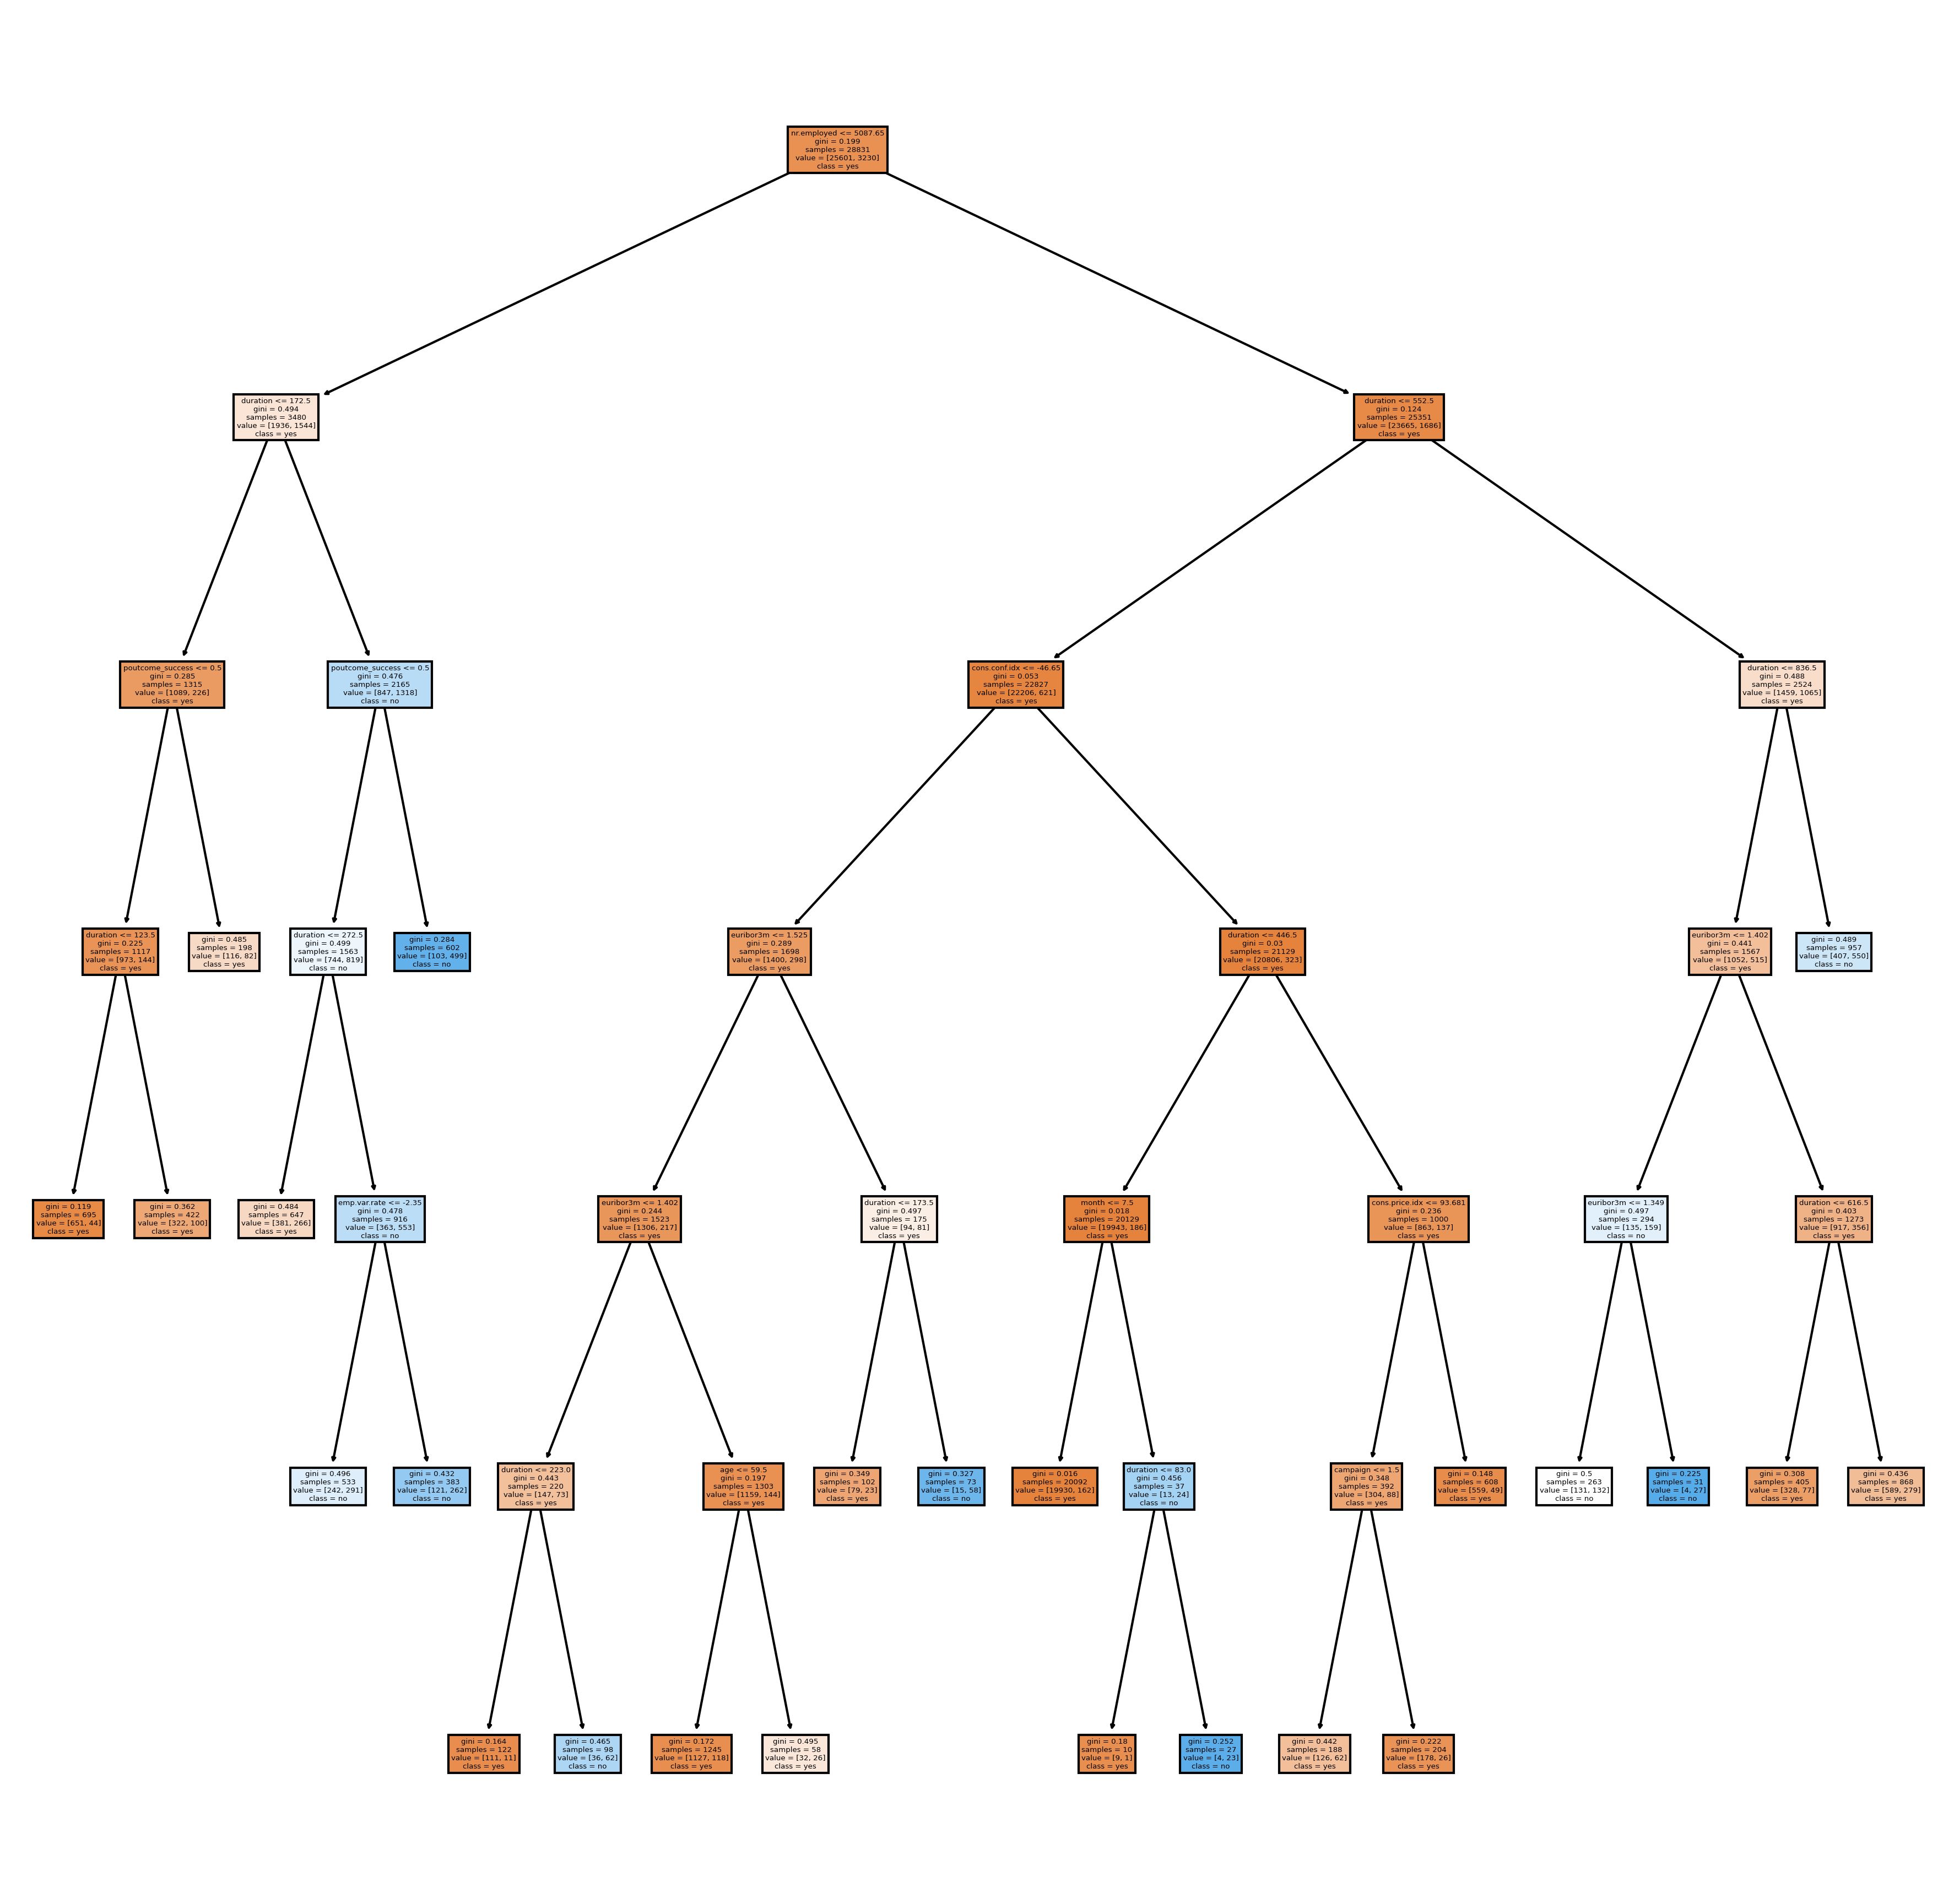

In [62]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt
feat=[]
for i in X_train.columns:
  feat.append(i)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)
sklearn.tree.plot_tree(clf_best,
               feature_names = feat, 
               class_names=["yes","no"],
               filled = True)
fig.savefig('imagename.png')

# Random Forest Classifier

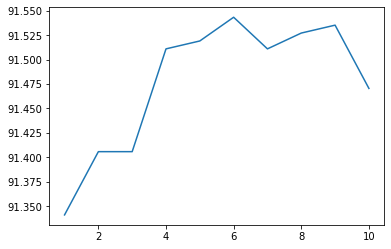

In [52]:
#best estimators
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
rf_est=[]
for i in range(100,1100,100):
  clf=RandomForestClassifier(n_estimators=i,bootstrap=True,oob_score=False,random_state=51)
  clf.fit(X_train,Y_train)
  Y_pred=clf.predict(X_test)
  rf_est.append(metrics.accuracy_score(Y_test,Y_pred)*100)   #recall_score
k=rf_est.index(max(rf_est))+1
plt.plot(range(1,11),rf_est)
plt.show()


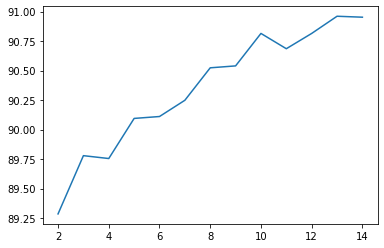

In [53]:
#best depth
rf_dep=[]
for i in range(2,15):
  clf=RandomForestClassifier(n_estimators=k,bootstrap=True,oob_score=False,max_depth=i,random_state=51)
  clf.fit(X_train,Y_train)
  Y_pred=clf.predict(X_test)
  rf_dep.append(metrics.accuracy_score(Y_test,Y_pred)*100)
l=rf_dep.index(max(rf_dep))+2
plt.plot(range(2,15),rf_dep)
plt.show()

c:\users\rakti\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10947
           1       0.64      0.47      0.54      1410

    accuracy                           0.91     12357
   macro avg       0.79      0.72      0.75     12357
weighted avg       0.90      0.91      0.90     12357



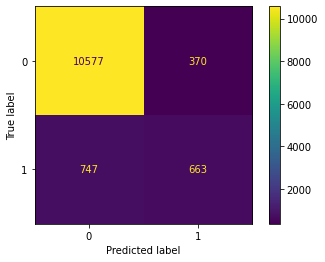

In [57]:
rf_clf_best=RandomForestClassifier(n_estimators=k,bootstrap=True,oob_score=False,max_depth=l,random_state=51)
rf_clf_best.fit(X_train,Y_train)
Y_pred_rf=rf_clf_best.predict(X_test)

from sklearn.metrics import plot_confusion_matrix
confusion_matrix = plot_confusion_matrix(rf_clf_best, X_test, Y_test)


print(classification_report(Y_test, Y_pred_rf))

# Naive Bayes

c:\users\rakti\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.94      0.87      0.90     10947
           1       0.36      0.58      0.44      1410

    accuracy                           0.84     12357
   macro avg       0.65      0.72      0.67     12357
weighted avg       0.87      0.84      0.85     12357



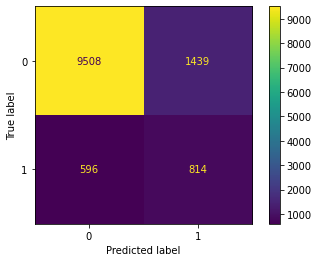

In [56]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, Y_train)
Y_pred_nb=nb_clf.predict(X_test)
from sklearn.metrics import plot_confusion_matrix
confusion_matrix = plot_confusion_matrix(nb_clf, X_test, Y_test)
print(classification_report(Y_test, Y_pred_nb))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10947
           1       0.62      0.55      0.58      1410

    accuracy                           0.91     12357
   macro avg       0.78      0.75      0.77     12357
weighted avg       0.91      0.91      0.91     12357



c:\users\rakti\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


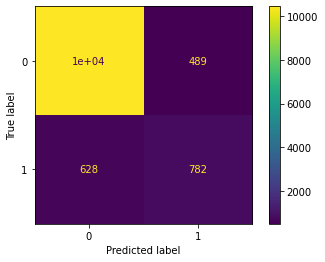

In [60]:
from sklearn.ensemble import VotingClassifier
vot_clf=VotingClassifier(estimators=[('dt',clf_best),('rf',rf_clf_best),('gnb',nb_clf)],voting='soft')
vot_clf=vot_clf.fit(X_train,Y_train)
v_pred=vot_clf.predict(X_test)
from sklearn.metrics import plot_confusion_matrix
confusion_matrix = plot_confusion_matrix(vot_clf, X_test, Y_test)
print(classification_report(Y_test, v_pred))